In [1]:
# ARIMA() -> order(p,d,q)
# AR - Autoregression (p)
# I - difference (d)
# MA - moving average (q)

In [2]:
# order d in the ARIMA model

In [3]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

In [4]:
df.head()

,value
0,88
1,84
2,85
3,85
4,84


In [5]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
# original
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# 1st order differencing
result = adfuller(df.value.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# 2st order differencing
result = adfuller(df.value.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419
ADF Statistic: -2.722238
p-value: 0.070268
ADF Statistic: -9.929762
p-value: 0.000000


In [6]:
# null hypothesis of the ADF test is that the time series is non-stationary
# if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary
# in our case, P Value > 0.05 -> finding the order of differencing

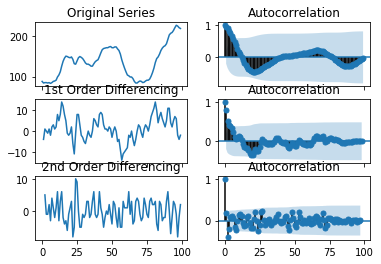

In [7]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [8]:
# the time series reaches stationarity with two orders of differencing
# But the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick -> the series might have been over differenced
# d = 1

In [9]:
# order p in the ARIMA model

In [10]:
# Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags
# PACF conveys the pure correlation between a lag and the series
# you will know if that lag is needed in the AR term or not.

C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


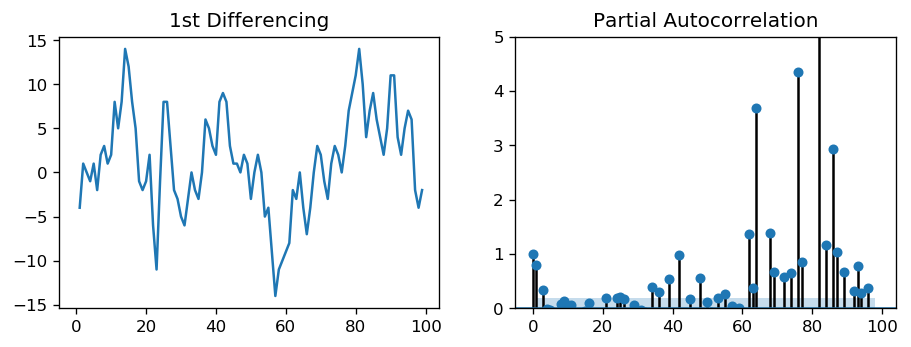

In [11]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

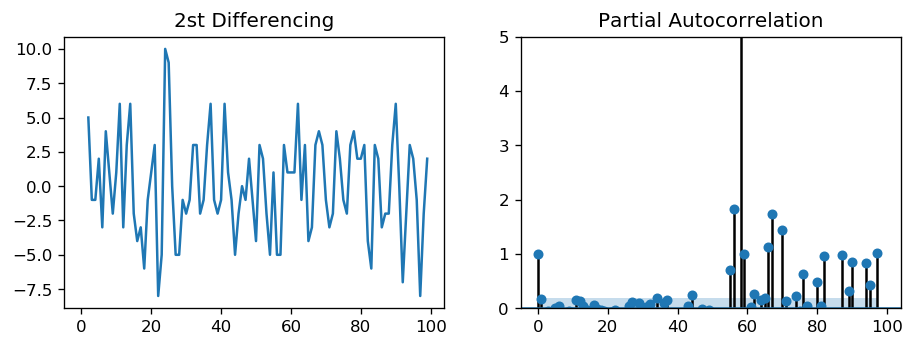

In [12]:
# PACF plot of 2nd differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().diff().dropna(), ax=axes[1])

plt.show()

In [13]:
# lag 1 is quite significant as it is well above the significance line
# lag 2 turns out to be significant as well, slightly managing to cross the significance limit
# p = 1

In [14]:
# order q in the ARIMA model

In [15]:
# look at the ACF plot for the number of MA terms
# An MA term is technically, the error of the lagged forecast

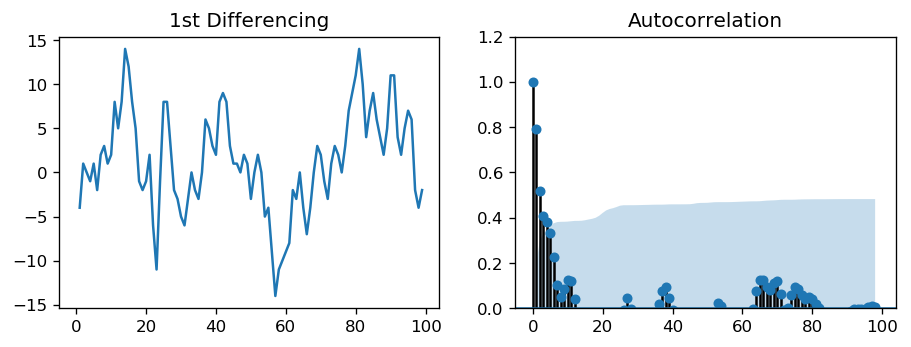

In [16]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [17]:
# Couple of lags are well above the significance line
# So, let’s tentatively fix q as 2. When in doubt, go with the simpler model that sufficiently explains the Y
# q = 2

In [18]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Tue, 19 Nov 2019   AIC                            517.579
Time:                        17:37:34   BIC                            530.555
Sample:                             1   HQIC                           522.829
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1202      1.290      0.868      0.387      -1.409       3.649
ar.L1.D.value     0.6351      0.257      2.469      0.015       0.131       1.139
ma.L1.D.value     0.5287      0.355     

In [19]:
# the coefficient of the MA2 term is close to zero 
# the P-Value in ‘P>|z|’ column is highly insignificant
# It should ideally be less than 0.05 for the respective X to be significant

In [20]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Tue, 19 Nov 2019   AIC                            515.579
Time:                        17:37:36   BIC                            525.960
Sample:                             1   HQIC                           519.779
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1205      1.286      0.871      0.386      -1.400       3.641
ar.L1.D.value     0.6344      0.087      7.317      0.000       0.464       0.804
ma.L1.D.value     0.5297      0.089     

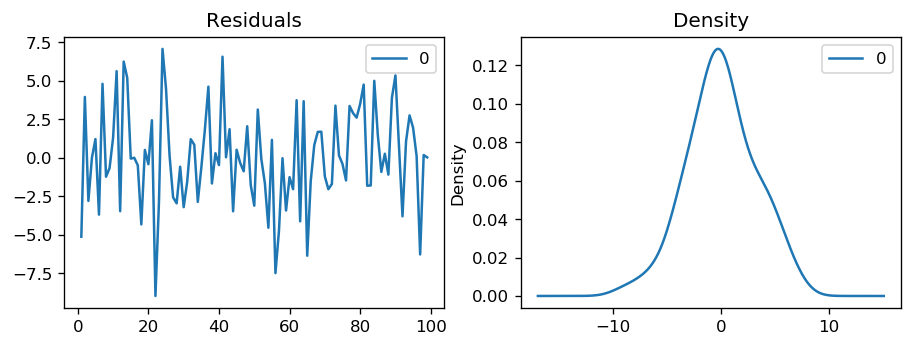

In [21]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

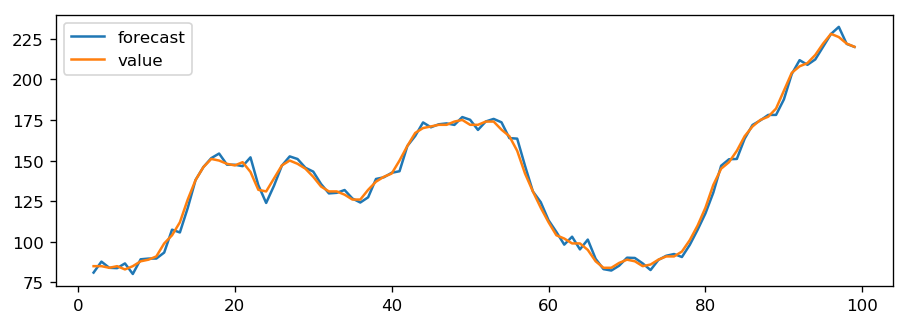

In [22]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

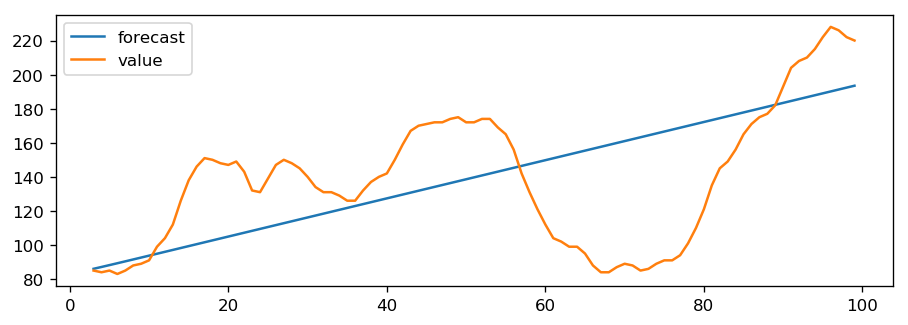

In [23]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=True)
plt.show()

In [24]:
# When you set dynamic=False the in-sample lagged values are used for prediction

In [25]:
# the model gets trained up until the previous value to make the next prediction
# This can make the fitted forecast and actuals look artificially good